In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Data Science Asignments datasets\EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<AxesSubplot:>

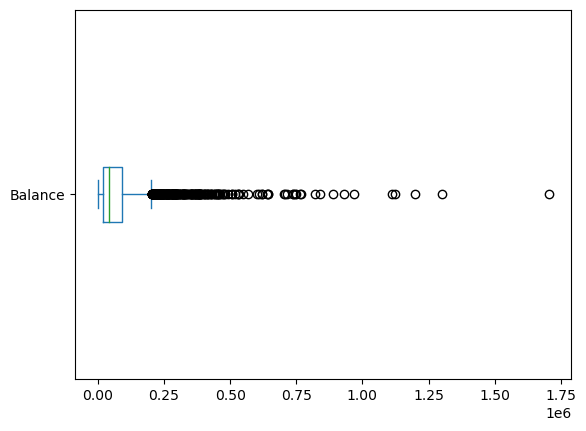

In [4]:
df["Balance"].plot(kind='box',vert=False)

In [5]:
#Treating outliers
import numpy as np
Q1 = np.percentile(df["Balance"],25)
Q3 = np.percentile(df["Balance"],75)
IQR = Q3 - Q1
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [6]:
len(df["Balance"][df["Balance"]>UW])

266

In [7]:
df["Balance"][df["Balance"]>UW] = UW

<AxesSubplot:>

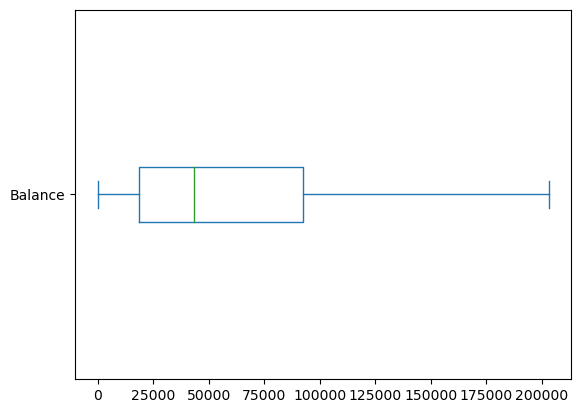

In [8]:
df["Balance"].plot(kind='box',vert=False)

<AxesSubplot:>

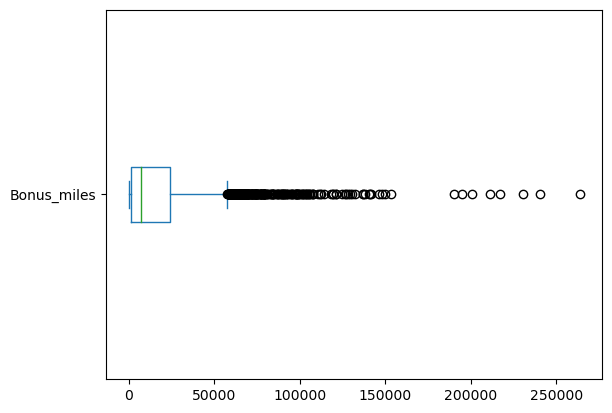

In [9]:
df["Bonus_miles"].plot(kind='box',vert=False)

In [10]:
#Treating outliers
import numpy as np
Q1 = np.percentile(df["Bonus_miles"],25)
Q3 = np.percentile(df["Bonus_miles"],75)
IQR = Q3 - Q1
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [11]:
len(df["Bonus_miles"][df["Bonus_miles"]>UW])

280

In [12]:
df["Bonus_miles"][df["Bonus_miles"]>UW] = UW

C:\Users\padal\AppData\Local\Temp\ipykernel_27056\2616130950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bonus_miles"][df["Bonus_miles"]>UW] = UW


<AxesSubplot:>

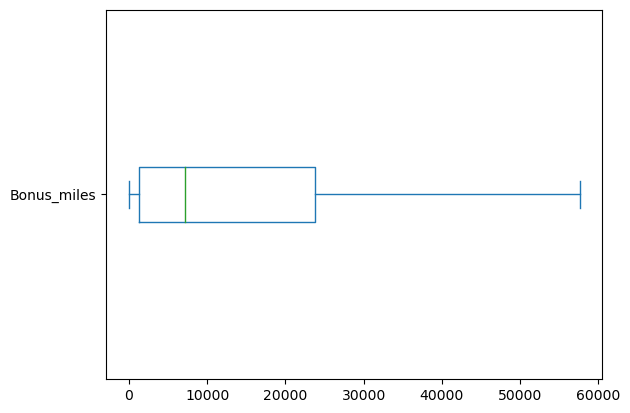

In [13]:
df["Bonus_miles"].plot(kind='box',vert=False)

<AxesSubplot:>

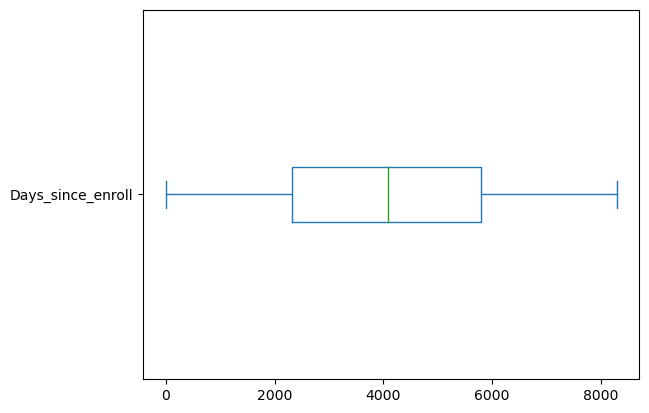

In [14]:
df["Days_since_enroll"].plot(kind='box',vert=False)

In [15]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,0,1,1,1,174.0,1,0,0,7000,0
1,2,19244.0,0,1,1,1,215.0,2,0,0,6968,0
2,3,41354.0,0,1,1,1,4123.0,4,0,0,7034,0
3,4,14776.0,0,1,1,1,500.0,1,0,0,6952,0
4,5,97752.0,0,4,1,1,43300.0,26,2077,4,6935,1


In [16]:
X = df.iloc[:,1:11]

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0:1],X.iloc[:,1:2])
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(X)
SS_X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.607258,-0.186299,-0.769578,-0.098242,-0.062767,-0.843091,-1.104065,-0.328603,-0.362168,1.395454
1,-0.758947,-0.186299,-0.769578,-0.098242,-0.062767,-0.840822,-0.999926,-0.328603,-0.362168,1.379957
2,-0.382070,-0.186299,-0.769578,-0.098242,-0.062767,-0.624581,-0.791649,-0.328603,-0.362168,1.411920
3,-0.835106,-0.186299,-0.769578,-0.098242,-0.062767,-0.825052,-1.104065,-0.328603,-0.362168,1.372208
4,0.579265,-0.186299,1.409471,-0.098242,-0.062767,1.543191,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,-0.186299,-0.769578,-0.098242,-0.062767,-0.381007,-0.791649,-0.185750,-0.098503,-1.315120
3995,0.010506,-0.186299,-0.769578,-0.098242,-0.062767,-0.798437,-0.687511,-0.328603,-0.362168,-1.318994
3996,0.167530,-0.186299,0.683121,-0.098242,-0.062767,0.555335,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.151188,-0.186299,-0.769578,-0.098242,-0.062767,-0.825052,-1.104065,0.028531,-0.098503,-1.316088
